# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from scipy.stats import sem
from matplotlib.pyplot import pie, axis, show



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [57]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [58]:
#add url, add city name, but create a loop so it loops through all 600 cities 

url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = f"{url}appid={weather_api_key}&q="


In [6]:
#need city, lat, lng, max temp, humidity, cloudiness, wind speed, country, date 

#setting lists 
cities_found = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind = []
country = []
date = []

for city in cities: 
    response = requests.get(query_url + city)
    response_json = response.json() 
    try:
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        max_temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        cities_found.append(city)
        date.append(response_json['dt'])
    except:
        print("Couldnt find " + city)
   

Couldnt find kamenskoye
Couldnt find vaitupu
Couldnt find belushya guba
Couldnt find taolanaro
Couldnt find illoqqortoormiut
Couldnt find attawapiskat
Couldnt find tumannyy
Couldnt find rawannawi
Couldnt find louisbourg
Couldnt find sentyabrskiy
Couldnt find nizhneyansk
Couldnt find sorvag
Couldnt find grand river south east
Couldnt find haibowan
Couldnt find fianga
Couldnt find barroualie
Couldnt find barentsburg
Couldnt find chagda
Couldnt find umzimvubu
Couldnt find mys shmidta
Couldnt find scalloway
Couldnt find umm durman
Couldnt find viligili
Couldnt find saleaula
Couldnt find amderma
Couldnt find asayita
Couldnt find skagastrond
Couldnt find alotau
Couldnt find nguiu
Couldnt find palabuhanratu
Couldnt find wulanhaote
Couldnt find camboriu
Couldnt find zhanatas
Couldnt find rebokon
Couldnt find la uribe
Couldnt find tsihombe
Couldnt find jabiru
Couldnt find vestbygda
Couldnt find samusu
Couldnt find warqla
Couldnt find fort saint john
Couldnt find lolua
Couldnt find sataua
Couldn

In [7]:
weather_cities = pd.DataFrame({ "City": cities_found, "Latitude" : lat, "Longitude": lng, "Max Temp": max_temp, "Humidity": humidity,
                               "Cloudiness": cloudiness, "Wind Speed": wind, "Country": country, "Date": date
    
    
    
})



In [8]:
weather_cities.to_csv(output_data_file)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_cities.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ust-maya,60.4167,134.5333,248.89,87,76,1.02,RU,1613440974
1,tuktoyaktuk,69.4541,-133.0374,245.15,76,75,1.54,CA,1613440975
2,albany,42.6001,-73.9662,270.37,75,100,0.50,US,1613440832
3,qaanaaq,77.4840,-69.3632,251.40,85,69,0.49,GL,1613440975
4,vaini,-21.2000,-175.2000,304.15,66,40,2.57,TO,1613440975


In [10]:
weather_cities.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,5.870000e+02
mean,21.088436,16.837632,282.275077,75.367973,53.962521,3.423015,1.613441e+09
std,32.999837,90.729253,17.823968,18.116165,40.281162,2.336543,8.144707e+01
min,-54.800000,-175.200000,238.910000,13.000000,0.000000,0.200000,1.613440e+09
25%,-3.774250,-63.574150,269.260000,67.000000,10.500000,1.540000,1.613441e+09
50%,24.344800,19.802800,288.150000,80.000000,65.000000,2.830000,1.613441e+09
75%,48.665650,96.085000,297.175000,88.000000,96.000000,4.940000,1.613441e+09
max,78.218600,179.316700,308.710000,100.000000,100.000000,12.860000,1.613441e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#no cities with humidity over 100 as the max humidity was reported to be 100 in the table above

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

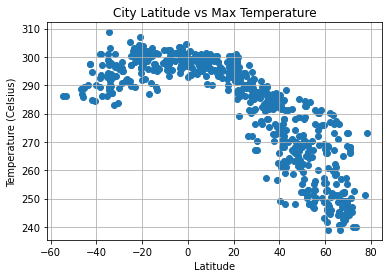

In [15]:
plt.scatter(weather_cities["Latitude"], weather_cities["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureVLatitude.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

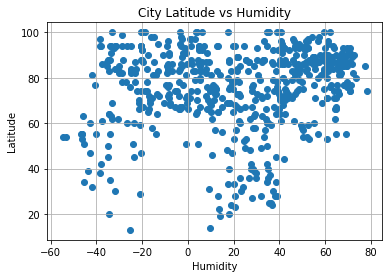

In [21]:
plt.scatter(weather_cities["Latitude"], weather_cities["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Latitude")
plt.xlabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVHumidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

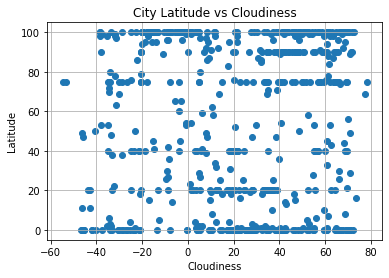

In [22]:
plt.scatter(weather_cities["Latitude"], weather_cities["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVCloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

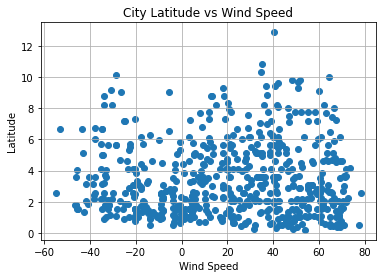

In [23]:
plt.scatter(weather_cities["Latitude"], weather_cities["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("LatitudeVWindSpeed.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [26]:
northern_df = weather_cities.loc[weather_cities["Latitude"] > 0]

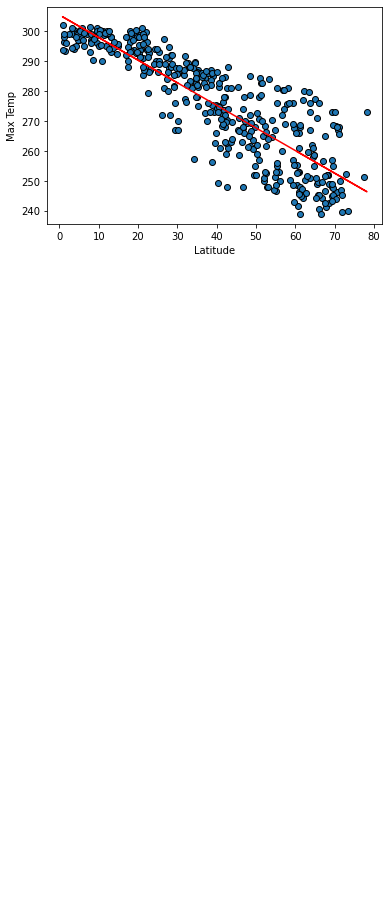

The r value is: -0.8700524195732731
The regression equation is y = -0.75x + 305.43


In [51]:
y_values = northern_df["Max Temp"]
x_values = northern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")

plt.show()
print(f"The r value is: {rvalue}")
print(f'The regression equation is {line_eq}')

The r-value is: 0.46937863826630627


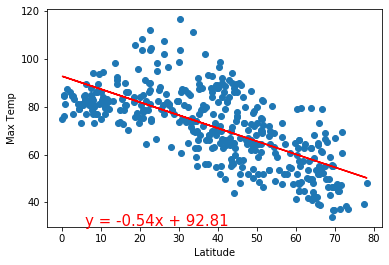

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [43]:
southern_df = weather_cities.loc[weather_cities["Latitude"] < 0]

In [44]:
southern_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,vaini,-21.2000,-175.2000,304.15,66,40,2.57,TO,1613440975
5,rikitea,-23.1203,-134.9692,299.83,78,0,5.30,PF,1613440976
7,geraldton,-28.7667,114.6000,298.15,78,0,5.66,AU,1613440976
8,arraial do cabo,-22.9661,-42.0278,298.21,87,50,2.91,BR,1613440977
9,ampanihy,-24.7000,44.7500,297.01,82,100,2.59,MG,1613440977


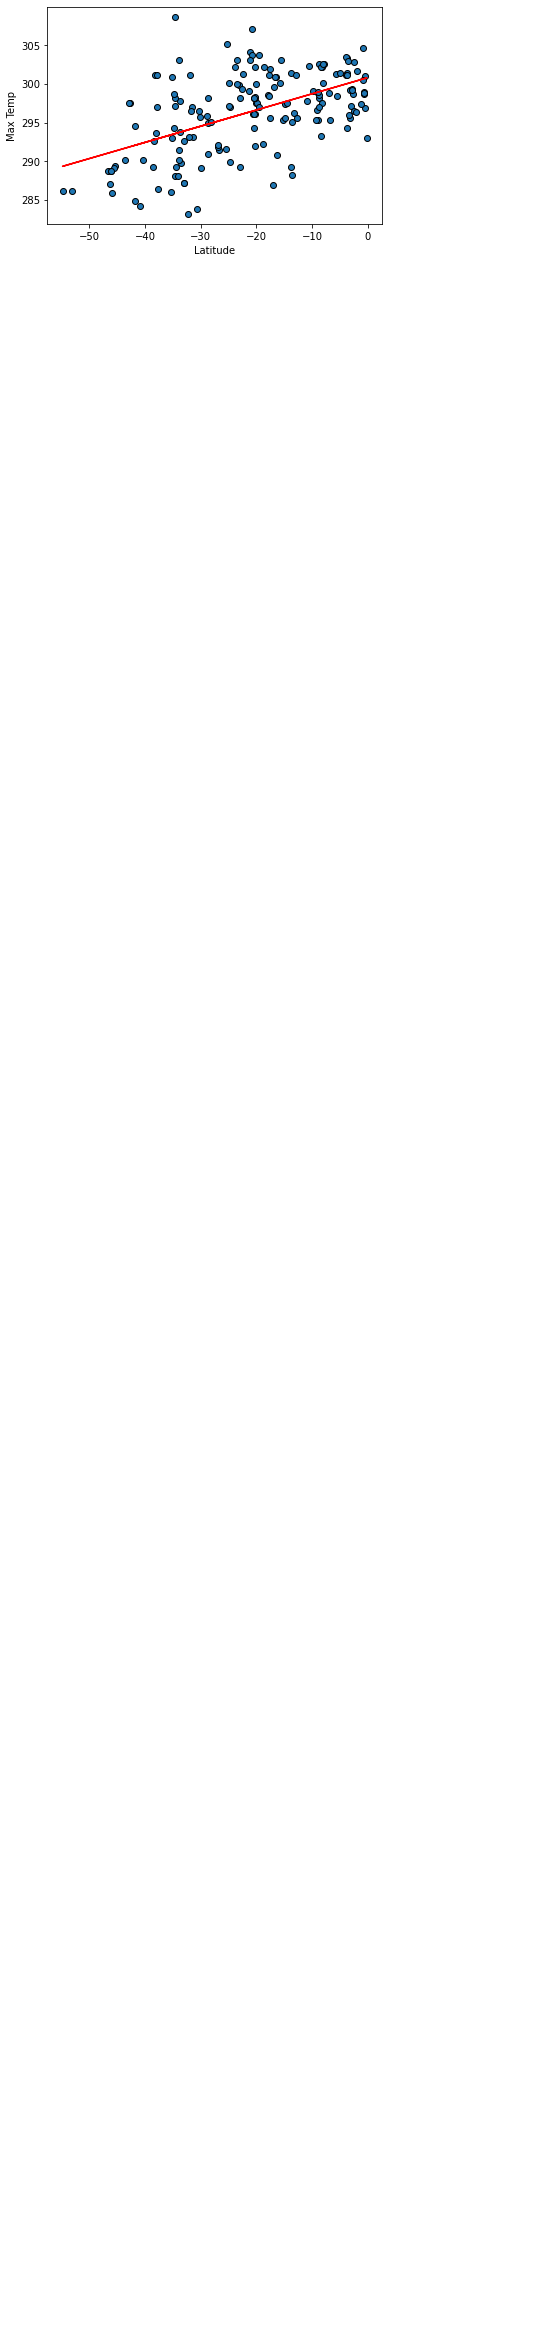

The r value is: 0.5360831392443041
The regression equation is y = 0.21x + 300.83


In [50]:
y_values = southern_df["Max Temp"]
x_values = southern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")

plt.show()
print(f"The r value is: {rvalue}")
print(f'The regression equation is {line_eq}')

The r-value is: 0.6082708688906918


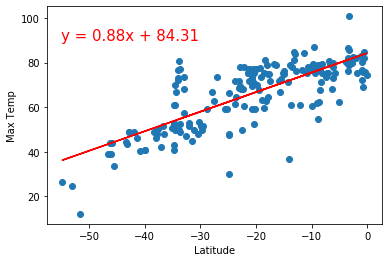

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

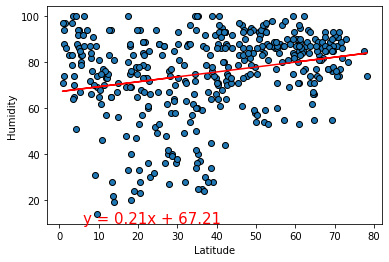

The r value is: 0.24171451184348824
The regression equation is y = 0.21x + 67.21


In [49]:
y_values = northern_df["Humidity"]
x_values = northern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")

plt.show()
print(f"The r value is: {rvalue}")
print(f'The regression equation is {line_eq}')

The r-value is: 0.000543987878808455


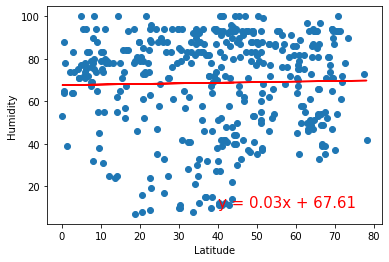

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

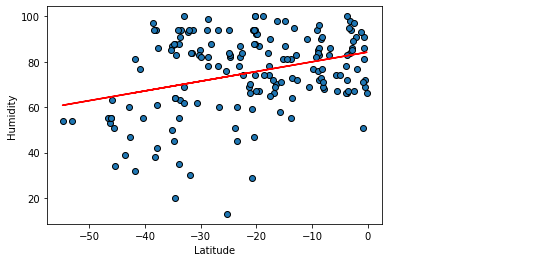

The r value is: 0.325782211790031
The regression equation is y = 0.43x + 84.23


In [48]:
y_values = southern_df["Humidity"]
x_values = southern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")

plt.show()
print(f"The r value is: {rvalue}")
print(f'The regression equation is {line_eq}')

The r-value is: 0.014985174297345524


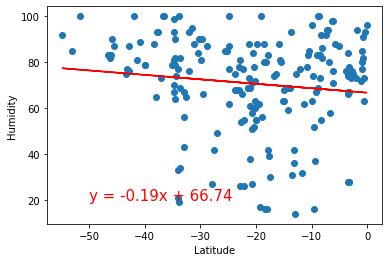

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

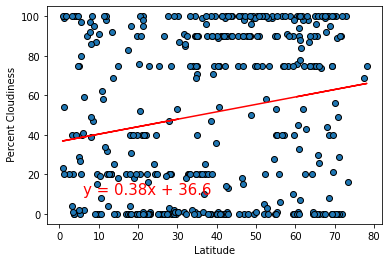

The r value is: 0.19259931363796295
The regression equation is y = 0.38x + 36.6


In [52]:
y_values = northern_df["Cloudiness"]
x_values = northern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.ylabel(" Percent Cloudiness")
plt.xlabel("Latitude")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")

plt.show()
print(f"The r value is: {rvalue}")
print(f'The regression equation is {line_eq}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

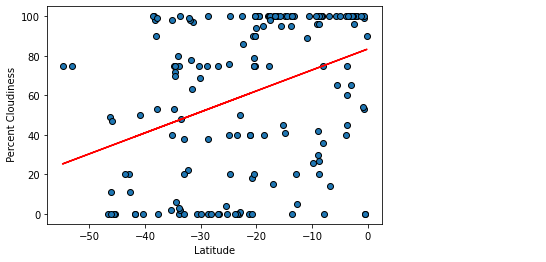

The r value is: 0.3646242417511396
The regression equation is y = 1.06x + 83.45


In [53]:
y_values = southern_df["Cloudiness"]
x_values = southern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.ylabel(" Percent Cloudiness")
plt.xlabel("Latitude")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")

plt.show()
print(f"The r value is: {rvalue}")
print(f'The regression equation is {line_eq}')

The r-value is: 0.0035263772085582894


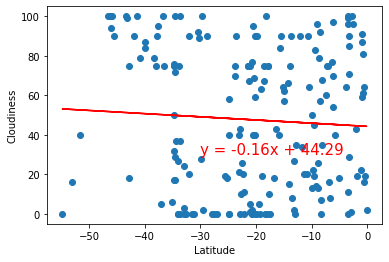

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

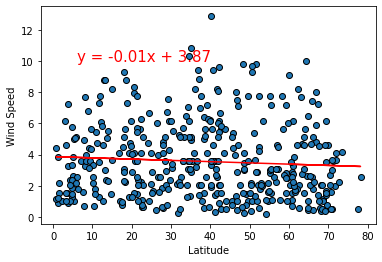

The r value is: -0.06886245453346757
The regression equation is y = -0.01x + 3.87


In [55]:
y_values = northern_df["Wind Speed"]
x_values = northern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")

plt.show()
print(f"The r value is: {rvalue}")
print(f'The regression equation is {line_eq}')

The r-value is: 0.04019723576144484


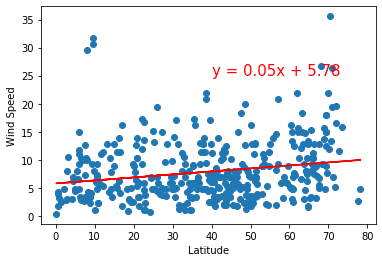

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

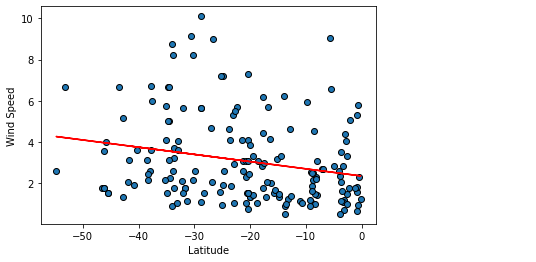

The r value is: -0.22544451646668504
The regression equation is y = -0.03x + 2.35


In [56]:
y_values = southern_df["Wind Speed"]
x_values = southern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, edgecolors = "black")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")

plt.show()
print(f"The r value is: {rvalue}")
print(f'The regression equation is {line_eq}')

The r-value is: 0.017128274759839232


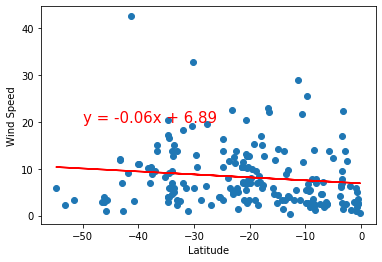